In [2]:
import geopandas as gpd
import pandas as pd

In [3]:
# set the filepath and load in a shape
fp = "./datasets/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<AxesSubplot:>

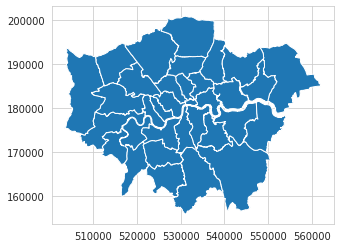

In [4]:
# Blank London Boroughs map
map_df.plot()

In [5]:
#df = pd.read_csv('datasets/london-borough-profile.csv', header=0)
df = pd.read_csv("scraped/working/listings_data_combined.csv",encoding="utf-8")
df['Price'] = pd.to_numeric(df['Price'], 'coerce').dropna().astype(int)
df = df[df["Price"] <= 600000]
print(df.shape)
df.head()

(7835, 23)


,ids,Station_Prox,bedrooms_model,bathrooms_model,compass,borough_name,propertySubType,tenure.tenureType,tenure.yearsRemainingOnLease,address.outcode,...,analyticsProperty.added,analyticsProperty.auctionOnly,analyticsProperty.minSizeFt,analyticsProperty.maxSizeFt,prices.pricePerSqFt,analyticsProperty.ownership,analyticsProperty.preOwned,analyticsProperty.priceQualifier,analyticsProperty.soldSTC,Price
0,123877802,0.1,2.0,2.0,SE,Greenwich,Apartment,LEASEHOLD,NaN,SE18,...,20220606,False,NaN,NaN,NaN,Non-shared ownership,Resale,None,False,450000.0
1,121140455,0.2,2.0,NaN,SE,Greenwich,Flat,LEASEHOLD,NaN,SE18,...,20220316,True,NaN,NaN,NaN,Non-shared ownership,Resale,Guide Price,False,135000.0
2,121118894,0.2,2.0,NaN,SE,Greenwich,Flat,NaN,NaN,SE18,...,20220315,True,NaN,NaN,NaN,Non-shared ownership,Resale,Guide Price,False,135000.0
3,120966290,0.2,3.0,2.0,SE,Greenwich,Apartment,LEASEHOLD,120.0,SE3,...,20220311,False,936.0,936.0,£144.23 per sq. ft.,Shared ownership,Resale,Shared ownership,False,135000.0
4,122513633,0.2,3.0,2.0,SE,Greenwich,Flat,LEASEHOLD,NaN,SE7,...,20220417,False,930.0,930.0,£145.70 per sq. ft.,Shared ownership,New Home,Shared ownership,False,135500.0


In [6]:
df.columns

Index(['ids', 'Station_Prox', 'bedrooms_model', 'bathrooms_model', 'compass',
       'borough_name', 'propertySubType', 'tenure.tenureType',
       'tenure.yearsRemainingOnLease', 'address.outcode', 'address.incode',
       'location.latitude', 'location.longitude', 'analyticsProperty.added',
       'analyticsProperty.auctionOnly', 'analyticsProperty.minSizeFt',
       'analyticsProperty.maxSizeFt', 'prices.pricePerSqFt',
       'analyticsProperty.ownership', 'analyticsProperty.preOwned',
       'analyticsProperty.priceQualifier', 'analyticsProperty.soldSTC',
       'Price'],
      dtype='object')

In [7]:
# those are really terrible column names. let's rename them to something simpler
score = df.rename(index=str, columns={"Station_Prox": "closeness_to_station",'bedrooms_model':'bedrooms','bathrooms_model':'bathrooms','tenure.tenureType':'tenureType'}
                                      )
score.head()

,ids,closeness_to_station,bedrooms,bathrooms,compass,borough_name,propertySubType,tenureType,tenure.yearsRemainingOnLease,address.outcode,...,analyticsProperty.added,analyticsProperty.auctionOnly,analyticsProperty.minSizeFt,analyticsProperty.maxSizeFt,prices.pricePerSqFt,analyticsProperty.ownership,analyticsProperty.preOwned,analyticsProperty.priceQualifier,analyticsProperty.soldSTC,Price
0,123877802,0.1,2.0,2.0,SE,Greenwich,Apartment,LEASEHOLD,NaN,SE18,...,20220606,False,NaN,NaN,NaN,Non-shared ownership,Resale,None,False,450000.0
1,121140455,0.2,2.0,NaN,SE,Greenwich,Flat,LEASEHOLD,NaN,SE18,...,20220316,True,NaN,NaN,NaN,Non-shared ownership,Resale,Guide Price,False,135000.0
2,121118894,0.2,2.0,NaN,SE,Greenwich,Flat,NaN,NaN,SE18,...,20220315,True,NaN,NaN,NaN,Non-shared ownership,Resale,Guide Price,False,135000.0
3,120966290,0.2,3.0,2.0,SE,Greenwich,Apartment,LEASEHOLD,120.0,SE3,...,20220311,False,936.0,936.0,£144.23 per sq. ft.,Shared ownership,Resale,Shared ownership,False,135000.0
4,122513633,0.2,3.0,2.0,SE,Greenwich,Flat,LEASEHOLD,NaN,SE7,...,20220417,False,930.0,930.0,£145.70 per sq. ft.,Shared ownership,New Home,Shared ownership,False,135500.0


In [8]:
score['Price'] = pd.to_numeric(score['Price'], 'coerce').fillna(-1).astype(int)

borough_property = score.groupby(['borough_name']).agg(mean_price=('Price',"mean"), median_price=('Price',"median"), total_properties=('ids','count'))
#borough_property = borough_property.reset_index()
borough_property

,mean_price,median_price,total_properties
borough_name,,,
Barnet,366528.832663,350000.0,1243
Brent,596127.008197,600000.0,122
Bromley,327389.655938,325000.0,901
Camden,401529.713115,450000.0,244
Croydon,251351.189765,225000.0,469
Ealing,418998.985573,430000.0,2218
Enfield,227578.300000,220000.0,50
Greenwich,140919.000000,126000.0,75
Islington,358886.373272,325000.0,217


In [9]:
# join the geodataframe with the cleaned up csv dataframe
#merged = map_df.set_index('NAME').join(borough_property.set_index('borough_name'))
merged = map_df.set_index('NAME').join(borough_property)

print(merged.shape)
merged

(33, 10)


,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,mean_price,median_price,total_properties
NAME,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",NaN,NaN,NaN
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",251351.189765,225000.0,469.0
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",327389.655938,325000.0,901.0
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",NaN,NaN,NaN
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",418998.985573,430000.0,2218.0
Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",NaN,NaN,NaN
Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",NaN,NaN,NaN
Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",NaN,NaN,NaN
Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",596127.008197,600000.0,122.0


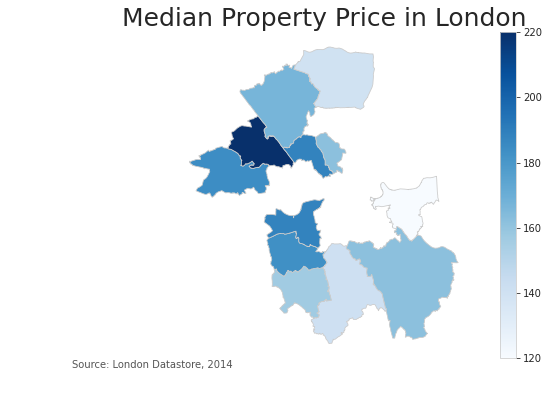

In [10]:
from matplotlib import pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
variable = 'median_price'

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Median Property Price in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

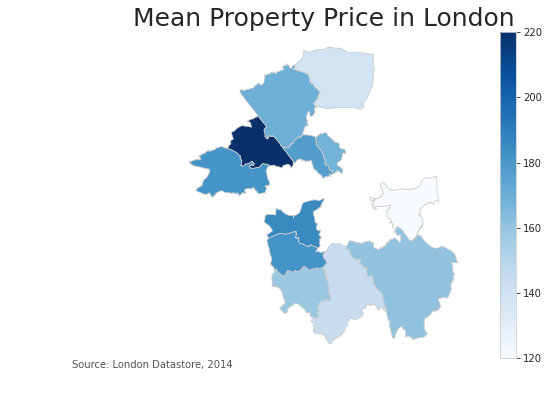

In [11]:
from matplotlib import pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
variable = 'mean_price'

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Mean Property Price in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

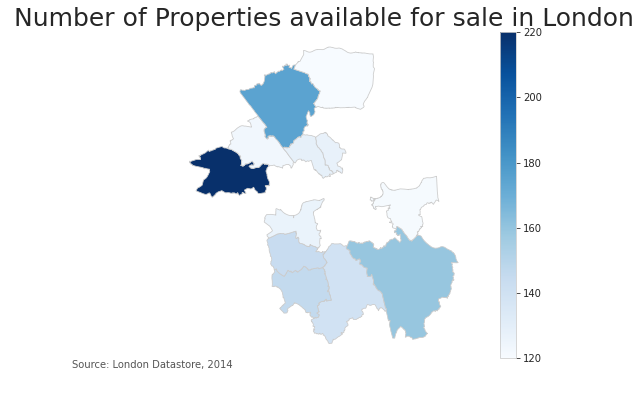

In [12]:
from matplotlib import pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
variable = 'total_properties'

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Number of Properties available for sale in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

